In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:

def highPassFiltering(img,size): 
    #Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 0 #Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 0
    return img
def lowPassFiltering(img,size):#Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img2 = np.zeros((h, w), np.uint8)#Define a blank black image with the same size as the Fourier Transform Transfer
    img2[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 1#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 1, preserving the low frequency part
    img3=img2*img #A low-pass filter is obtained by multiplying the defined low-pass filter with the incoming Fourier spectrogram one-to-one.
    return img3

def cv2_imread(file_path, flag=1):
    # Read Picture Data
    return cv2.imdecode(np.fromfile(file_path, dtype=np.uint8), flag)




In [8]:
test=RadialFilter(512,256,256,256)
print(test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
gray = cv2_imread("/home/ilker/Desktop/Camera Tracks/07.22.22/10kVgap_Pb210/EL-NoEL/EL/1/10kV, Pb210, Locked II0_00013.tif", 1)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

<ipython-input-10-4d07c72af65e>:12: RuntimeWarning: divide by zero encountered in log
  High_res = np.log(np.abs(High_dft_shift))


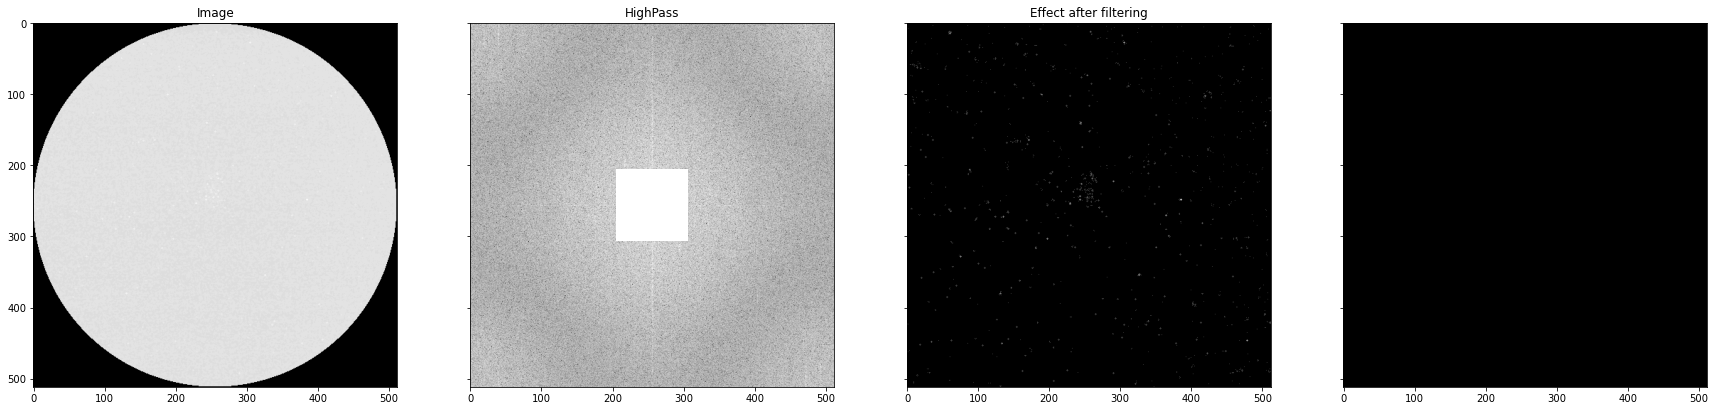

In [10]:
## High pass filter


#gray = cv2.resize(gray, (640, 420))

# Fourier transform
High_img_dft = np.fft.fft2(gray)
High_dft_shift = np.fft.fftshift(High_img_dft)  # Move frequency domain from upper left to middle

#High pass filter
High_dft_shift=highPassFiltering(High_dft_shift,100)
High_res = np.log(np.abs(High_dft_shift))


# Inverse Fourier Transform
High_idft_shift = np.fft.ifftshift(High_dft_shift)  #Move the frequency domain from the middle to the upper left corner
High_ifimg = np.fft.ifft2(High_idft_shift)  # Fourier library function call
High_ifimg = np.abs(High_ifimg)
#cv2.imshow("ifimg",np.int8(ifimg))
#cv2.imshow("gray",gray)

Circle_dft_shift=np.fft.fftshift(np.fft.fft2(gray))
Circle_idft_shift = np.fft.ifftshift(Circle_dft_shift)  #Move the frequency domain from the middle to the upper left corner
Circle_ifimg = np.fft.ifft2(Circle_idft_shift*test[0])  # Fourier library function call
Circle_ifimg = np.abs(Circle_ifimg)
# Draw pictures

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 20), sharex=True, sharey=True)
ax[0].set_title('Image')
ax[0].imshow(gray*test,cmap='gray')
ax[1].set_title('HighPass')
ax[1].imshow(High_res,cmap='gray')
ax[2].set_title('Effect after filtering')
ax[2].imshow(np.int8(High_ifimg),cmap='gray')
ax[3].imshow(np.int8(Circle_ifimg),cmap='gray')

plt.show()


In [ ]:
#### Low Pass Filter


#gray2 = cv2.resize(gray2, (1280, 720))

h,w =gray.shape


# Fourier transform
Low_img_dft = np.fft.fft2(gray)
Low_dft_shift = np.fft.fftshift(Low_img_dft)  # Move frequency domain from upper left to middle

# Low-pass filter
Low_dft_shift = lowPassFiltering(Low_dft_shift, 150)
Low_res = np.log(np.abs(Low_dft_shift))

# Inverse Fourier Transform
Low_idft_shift = np.fft.ifftshift(Low_dft_shift)  # Move the frequency domain from the middle to the upper left corner
Low_ifimg = np.fft.ifft2(Low_idft_shift)  # Fourier library function call
Low_ifimg = np.abs(Low_ifimg)
#cv2.imshow("ifimg", np.int8(ifimg))
#cv2.imshow("gray", gray)

# Draw pictures
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20), sharex=True, sharey=True)
ax[0].set_title('Image')
ax[0].imshow(gray,cmap='gray')
ax[1].set_title('LowPass')
ax[1].imshow(Low_res,cmap='gray')
ax[2].set_title('Effect after filtering')
ax[2].imshow(np.int8(Low_ifimg),cmap='gray')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#### Band Pass Filter


h,w =gray.shape


# Fourier transform
Low_img_dft = np.fft.fft2(gray)
Low_dft_shift = np.fft.fftshift(Low_img_dft)  # Move frequency domain from upper left to middle

# Low-pass filter
Low_dft_shift = lowPassFiltering(Low_dft_shift, 200)
#Low_res = np.log(np.abs(dft_shift))

# Fourier transform
High_img_dft = np.fft.fft2(gray)
High_dft_shift = np.fft.fftshift(High_img_dft)  # Move frequency domain from upper left to middle

#High pass filter
High_dft_shift=highPassFiltering(High_dft_shift,50)
High_res = np.log(np.abs(High_dft_shift))


# Inverse Fourier Transform
Low_idft_shift = np.fft.ifftshift(Low_dft_shift)  # Move the frequency domain from the middle to the upper left corner
Low_ifimg = np.fft.ifft2(Low_idft_shift)  # Fourier library function call
Low_ifimg = np.abs(Low_ifimg)

BandShift=Low_dft_shift+High_dft_shift
BandPass_res=np.log(np.abs(BandShift))
Band_idft_shift=np.fft.ifftshift(BandShift)
Band_ifimg=np.fft.ifft2(BandShift)
Band_ifimg=np.abs(Band_ifimg)

#cv2.imshow("ifimg", np.int8(ifimg))
#cv2.imshow("gray", gray)

# Draw pictures
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20), sharex=True, sharey=True)
ax[0].set_title('Image')
ax[0].imshow(gray,cmap='gray')
ax[1].set_title('BandPass Filter')
ax[1].imshow(BandPass_res,cmap='gray')
ax[2].set_title('Effect after filtering')
ax[2].imshow(np.int8(Band_ifimg),cmap='gray')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

median_blur= cv2.medianBlur(gray, 3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 20))
ax[0].set_title('Image')

ax[1].imshow(median_blur,cmap=plt.get_cmap('hot'),origin="lower", interpolation='nearest',vmin=(np.mean(median_blur)), vmax=np.max(median_blur))
ax[0].imshow(gray,cmap=plt.get_cmap('hot'),origin="lower", interpolation='nearest',vmin=(np.mean(gray)), vmax=np.max(gray))
